In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [3]:
plt.style.use('ggplot')

In [4]:
data = data.dropna(subset = ['fecha'])
data['fecha'] = pd.to_datetime(data['fecha'])
data['sum'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 0 to 239999
Data columns (total 24 columns):
id                            240000 non-null int32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float32
habitaciones                  217529 non-null float32
garages                       202235 non-null float32
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float32
lat                           116512 non-null float32
lng                           116512 non-null float32
fecha                         240

Text(0, 0.5, 'publicaciones')

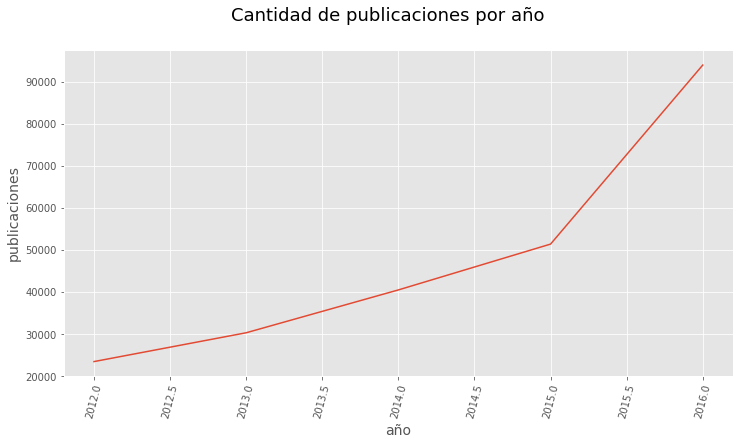

In [5]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio = por_anio.groupby('año').agg({'sum':'sum'}).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = por_anio['año'], y = por_anio['sum'])
plt.xticks(rotation=75)
plt.suptitle('Cantidad de publicaciones por año', fontsize=18)
plt.xlabel("año", fontsize = 14)
plt.ylabel("publicaciones", fontsize = 14)